In [1]:
# 마지막 553p
import numpy as np
import pandas as pd
import json

path = 'example.txt'
with open(path, encoding='utf-8') as f:
    records = [json.loads(line) for line in f]

records[1]

{'a': 'GoogleMaps/RochesterNY',
 'c': 'US',
 'nk': 0,
 'tz': 'America/Denver',
 'gr': 'UT',
 'g': 'mwszkS',
 'h': 'mwszkS',
 'l': 'bitly',
 'hh': 'j.mp',
 'r': 'http://www.AwareMap.com/',
 'u': 'http://www.monroecounty.gov/etc/911/rss.php',
 't': 1331923249,
 'hc': 1308262393,
 'cy': 'Provo',
 'll': [40.218102, -111.613297]}

In [5]:
#표준시간대 계산하기
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
'''
for문 한줄로
[표현식 for 항목 in 집합]

# 0부터 9까지 짝수만 모으기
test = [x for x in range(10) if x % 2 == 0]

# 0부터 9까지 짝수는 숫자로, 홀수는 '홀수'로
test2 = [x if x % 2 == 0 else '홀수' for x in range(10) ]
test2
'''

def get_counts(sequence):
    counts={}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

counts = get_counts(time_zones)
counts['America/New_York']
len(time_zones)

3440

In [6]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

# top_counts(counts)
# ########################
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

<Axes: xlabel='count', ylabel='tz'>

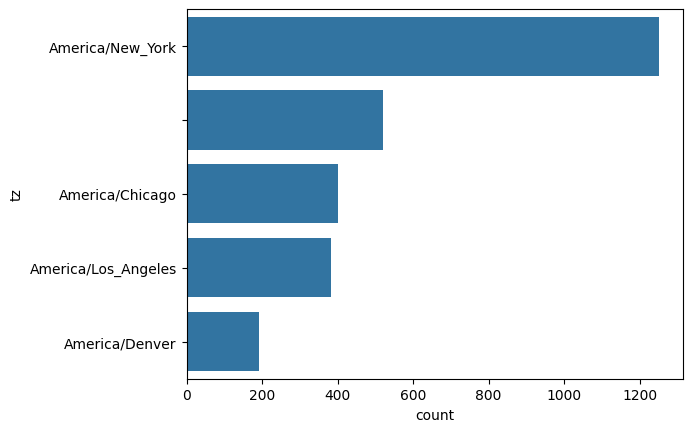

In [10]:
# pandas로 계산하기
frame = pd.DataFrame(records)
# frame.info()
# frame.head()
# frame.tail()
tz_counts = frame['tz'].value_counts()
tz_counts.head()

# seaborn
import seaborn as sns
subset = tz_counts.head() # 상위 5개
sns.barplot(y=subset.index, x=subset)

In [15]:
# 사용자 정보 가져오기 560
# records[4]['a']
result = pd.Series([x.split()[0] for x in frame['a'].dropna()])
# result.head()

'''
windows 7 == 6.1
windows xp == 5.1
google map rochesterNY == 구글 맵

Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'
Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'
Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2
Mozilla/5.0 (iPad; U; CPU OS 4_3_5 like Mac OS X; en-us) AppleWebKit/533.17.9 (KHTML, like Gecko) Version/5.0.2 Mobile/8L1 Safari/6533.18.5
'''
# records[500]['a']
result

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object